# Gold recovery process

**An aim of the research** — build a machine learning model and predict the recovery rate of gold from ore:
1. Study of the technological process
2. Analysis of key process parameters
3. Data checking and preprocessing
4. Statistical data analysis
5. Defenition of optimal hyper-parameters
6. selection of Machine Learning Algorithms
7. Testing on 3 different models
8. Calculation of sMAPE metric for models


**An initial data**

The dataframe is extracted from following files:
- `gold_recovery_full_new` 
- `gold_recovery_test_new` 
- `gold_recovery_train_new` 

The research is divided into four steps:
  1. Technological process and data overview
  2. Data pre-processing for machine learning
  3. Exploratory data analysis
  4. Models training and testing


### Step 1. Technological process and data overview

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st

from IPython.display import Image
from IPython.core.display import HTML   

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, r2_score, make_scorer

In [2]:
# set global parameters 
pd.set_option('precision', 2)
warnings.filterwarnings('ignore')

The technology of gold recovery is based on the selective fixation of minerals at the phase boundary and, as a result, their wettability. Flotation is carried out in mechanical flotation machines in the form of a bath of sheet steel, divided by partitions into several cubic chambers. A mixture of finely divided ore and liquid is fed into the apparatus along with special reagents.

Through the first chamber of the machine, it enters a rapidly rotating agitator - a wheel with hard steel blades, which rotates at a speed of 275-600 rpm, sucking in air in parallel. As a result of rotation, the pulp is mixed with small air bubbles. Gold-containing particles under the influence of reagents lose their ability to be wetted by water.

At the end of the process, gold-containing particles stick to air bubbles and float to the surface of the flotation machine chambers in the form of foam, while waste material remains in the pulp. The "golden" foam is dehydrated, obtaining a concentrate, which is sent for thickening and subsequent processing.

In [3]:
# gold processing diagram
Image(url='https://z4y6y3m2.rocketcdn.me/blog/wp-content/uploads/2015/10/gold-recovery-process-circuits1.png', 
      width=700, height=450
)

The use of reagents such as Xanthate, Sulphate, Depressant has a significant impact on the recovery of gold, especially its small natural inclusions, which often cannot be opened even with fine grinding and are lost in the pulp flow. The solution through the cracks and pores of the grains is able to seep to small gold particles and dissolve them. In this case, the greatest extraction of gold can be obtained in combination with the gravitational separation of large gold particles, and the harmful effect of sulfides is eliminated by first separating them using flotation.

In [4]:
# gold processing diagram
Image(url='https://ars.els-cdn.com/content/image/1-s2.0-S1385894721038626-gr1.jpg', 
      width=700, height=450
)

In [5]:
# read 'gold_recovery_full_new.csv' and print out 5 rows
try:
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:  
    full_df = pd.read_csv('C:\YandexPracticumProjects\Project_9_GoldProcessing_ML\gold_recovery_full_new.csv')

full_df.loc[0:4].style

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

In [6]:
# read 'gold_recovery_test_new.csv' and print out 5 rows
try:
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:  
    test_df = pd.read_csv('C:\YandexPracticumProjects\Project_9_GoldProcessing_ML\gold_recovery_test_new.csv')

test_df.loc[0:4].style

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [7]:
# read 'gold_recovery_train_new.csv' and print out 5 rows
try:
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:  
    train_df = pd.read_csv('C:\YandexPracticumProjects\Project_9_GoldProcessing_ML\gold_recovery_train_new.csv')

train_df.loc[0:4].style

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

In [8]:
# info on df_full
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
# info on df_test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
# info on df_train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


### Step 2. Data ckecking and pre-processing

#### Verification calculation of the recovery factor

In [11]:
# main variables for recovery calculation
C = full_df['rougher.output.concentrate_au']
F = full_df['rougher.input.feed_au']
T = full_df['rougher.output.tail_au']

In [12]:
# calculated rougher recovery
full_df['rougher.calculation.recovery'] = ((C * (F - T)) / (F * (C - T))) * 100

In [13]:
# function to calculate mean absolute error (MAE)
def mae(array1, array2):
    array1, array2 = np.array(array1), np.array(array2)
    return np.mean(np.abs(array1 - array2))

In [14]:
# print out MAE between calculated and output recovery 
print('MAE between calculated and output recovery:', mae(
    full_df['rougher.calculation.recovery'], full_df['rougher.output.recovery']
))

MAE between calculated and output recovery: 9.874045668302637e-15


#### Data pre-processing

In [15]:
# show columns with NaN values in df_test
test_df.isna().any()[lambda x: x]

primary_cleaner.input.sulfate               True
primary_cleaner.input.depressant            True
primary_cleaner.input.xanthate              True
rougher.input.feed_rate                     True
rougher.input.feed_size                     True
rougher.input.feed_sol                      True
rougher.input.floatbank10_sulfate           True
rougher.input.floatbank11_sulfate           True
rougher.input.floatbank11_xanthate          True
secondary_cleaner.state.floatbank2_a_air    True
secondary_cleaner.state.floatbank2_b_air    True
secondary_cleaner.state.floatbank3_a_air    True
dtype: bool

In [16]:
# show columns with NaN values in df_train
train_df.isna().any()[lambda x: x]

final.output.concentrate_ag                   True
final.output.concentrate_pb                   True
final.output.concentrate_sol                  True
final.output.tail_pb                          True
final.output.tail_sol                         True
                                              ... 
secondary_cleaner.state.floatbank5_a_level    True
secondary_cleaner.state.floatbank5_b_air      True
secondary_cleaner.state.floatbank5_b_level    True
secondary_cleaner.state.floatbank6_a_air      True
secondary_cleaner.state.floatbank6_a_level    True
Length: 62, dtype: bool

In [17]:
# fill in NaN values in datasets
test_df = test_df.fillna(method='ffill').fillna(method='bfill')
train_df = train_df.fillna(method='ffill').fillna(method='bfill')

The list of attributes that are present in the full data and absent in the test data:

 1   final.output.concentrate_ag                        
 2   final.output.concentrate_pb                      
 3   final.output.concentrate_sol                       
 4   final.output.concentrate_au                       
 5   final.output.recovery                            
 6   final.output.tail_ag                               
 7   final.output.tail_pb                               
 8   final.output.tail_sol                              
 9   final.output.tail_au                              
 14  primary_cleaner.output.concentrate_ag              
 15  primary_cleaner.output.concentrate_pb              
 16  primary_cleaner.output.concentrate_sol           
 17  primary_cleaner.output.concentrate_au              
 18  primary_cleaner.output.tail_ag                     
 19  primary_cleaner.output.tail_pb                      
 20  primary_cleaner.output.tail_sol                     
 21  primary_cleaner.output.tail_au                     
 30  rougher.calculation.sulfate_to_au_concentrate       
 31  rougher.calculation.floatbank10_sulfate_to_au_feed  
 32  rougher.calculation.floatbank11_sulfate_to_au_feed  
 33  rougher.calculation.au_pb_ratio                    
 44  rougher.output.concentrate_ag                      
 45  rougher.output.concentrate_pb                       
 46  rougher.output.concentrate_sol                     
 47  rougher.output.concentrate_au                  
 48  rougher.output.recovery                           
 49  rougher.output.tail_ag                       
 50  rougher.output.tail_pb                       
 51  rougher.output.tail_sol                      
 52  rougher.output.tail_au                              
 65  secondary_cleaner.output.tail_ag               
 66  secondary_cleaner.output.tail_pb                  
 67  secondary_cleaner.output.tail_sol                  
 68  secondary_cleaner.output.tail_au

As seen from the list, some of the parameters required for analysis are missing: the concentration of metals "concentrate" and the recovery coefficients "recovery". There is also "calculation" data that is not needed to train and test a machine learning model. Residuals from the chemical process "tail" as a whole are also not required for training and testing.

### Step 3. Exploratory data analysis

In [18]:
# convert datetime to index
full_df['date_id'] = pd.to_datetime(full_df['date'])
full_df['date_id'] = full_df['date_id'].apply(lambda x: x.value)
full_df = full_df.set_index('date_id')

train_df['date_id'] = pd.to_datetime(train_df['date'])
train_df['date_id'] = train_df['date_id'].apply(lambda x: x.value)
train_df = train_df.set_index('date_id')

test_df['date_id'] = pd.to_datetime(test_df['date'])
test_df['date_id'] = test_df['date_id'].apply(lambda x: x.value)
test_df = test_df.set_index('date_id')

In [19]:
# concentration of metals on each stage
rougher_output = [
    'rougher.output.concentrate_ag', 
    'rougher.output.concentrate_pb', 
    'rougher.output.concentrate_au'
]

primary_cleaner_output = [
    'primary_cleaner.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_au'
]

final_output = [
    'final.output.concentrate_ag', 
    'final.output.concentrate_pb', 
    'final.output.concentrate_au'
]

In [20]:
# colors for plotting out
palette = ['winter', 'spring', 'summer', 'Blues_r', 'Greys', 'plasma', 'Oranges']
color = ['steelblue', 'lightcoral', 'seagreen', 'steelblue', 'gray', 'orchid', 'orange']

In [21]:
# function to plot concentration on each stage
def hist(data, param, color, n_plots):    
    fig, ax = plt.subplots(1, n_plots, figsize=(16, 5))
    for i, j in enumerate(param):  
        data.hist(j, bins=100, ax=ax[i], color=color)
        ax[i].set_title(j)

In [22]:
# plot concentration on each stage
def boxplot(data, param, palette, n_plots):    
    fig, ax = plt.subplots(1, n_plots, figsize=(16, 5))
    for i, j in enumerate(param):  
        sns.boxplot(x=j, data=data, palette=palette, ax=ax[i])
        ax[i].set_title(j)

In [23]:
# categorize date by year, month and trial №
full_df['year'] = pd.DatetimeIndex(full_df['date']).year
full_df['month'] = pd.DatetimeIndex(full_df['date']).month
full_df['trial'] = pd.DatetimeIndex(full_df['date']).day
full_df['hour'] = pd.DatetimeIndex(full_df['date']).hour
full_df.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.calculation.recovery,year,month,trial,hour
date_id,,,,,,,,,,,,,,,,,,,,,
1514318399000000000,2017-12-26 19:59:59,0.00,0.00,0.00,0.00,0.00,13.59,3.83,7.22,5.06,...,-496.07,9.05,-499.78,12.00,-498.70,79.71,2017,12,26,19
1482227999000000000,2016-12-20 09:59:59,5.38,9.29,13.78,44.71,73.45,11.78,3.64,8.31,3.26,...,-500.65,12.00,-500.06,20.98,-500.52,89.09,2016,12,20,9
1493729999000000000,2017-05-02 12:59:59,4.12,11.37,9.04,45.57,62.73,8.72,3.77,9.30,3.24,...,-449.90,22.66,-449.89,30.02,-499.62,82.58,2017,5,2,12
1525305599000000000,2018-05-02 23:59:59,8.69,7.38,9.02,42.97,41.08,8.31,NaN,9.79,0.78,...,-498.69,22.98,-500.29,25.01,-498.51,67.13,2018,5,2,23
1506463199000000000,2017-09-26 21:59:59,4.13,11.67,8.00,46.57,64.65,6.16,3.21,12.29,2.89,...,-500.57,9.06,-500.19,12.00,-501.51,84.64,2017,9,26,21


#### Concentration of metals at different stages of the process

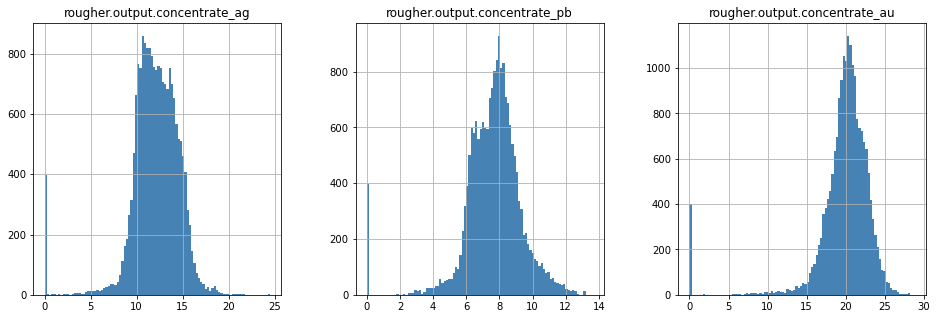

In [24]:
# histogram of rougher output concentrate
hist(full_df, rougher_output, color[0], 3)

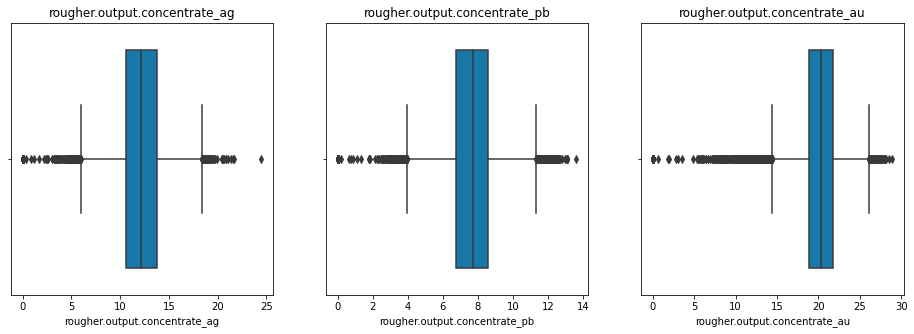

In [25]:
# boxplot of rougher output concentrate
boxplot(full_df, rougher_output, palette[0], 3)

In [26]:
# average of concentration on rougher output stage
rougher_output_ag_avg = full_df['rougher.output.concentrate_ag'].mean()
rougher_output_pb_avg = full_df['rougher.output.concentrate_pb'].mean()
rougher_output_au_avg = full_df['rougher.output.concentrate_au'].mean()

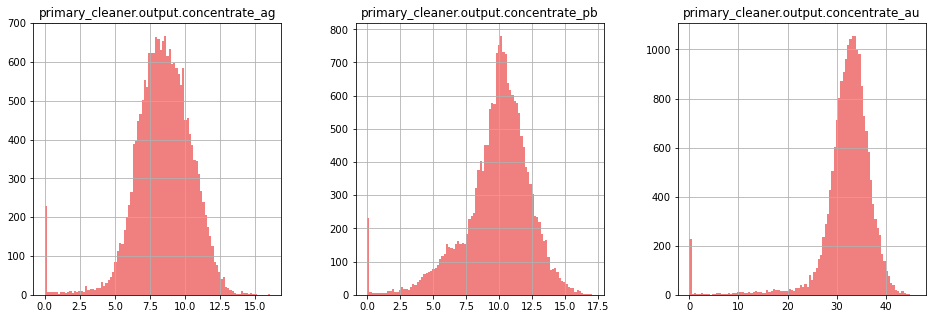

In [27]:
# histogram of primary cleaner output concentrate
hist(full_df, primary_cleaner_output, color[1], 3)

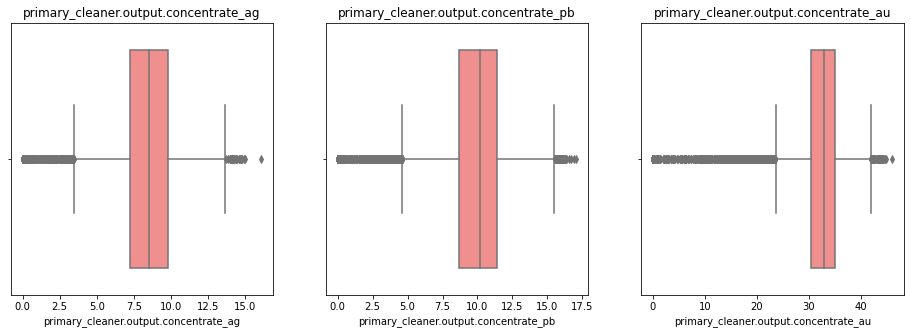

In [28]:
# boxplot of primary cleaner output concentrate
boxplot(full_df, primary_cleaner_output, palette[1], 3)

In [29]:
# average of concentration on primary cleaner stage
primary_cleaner_ag_avg = full_df['primary_cleaner.output.concentrate_ag'].mean()
primary_cleaner_pb_avg = full_df['primary_cleaner.output.concentrate_pb'].mean()
primary_cleaner_au_avg = full_df['primary_cleaner.output.concentrate_au'].mean()

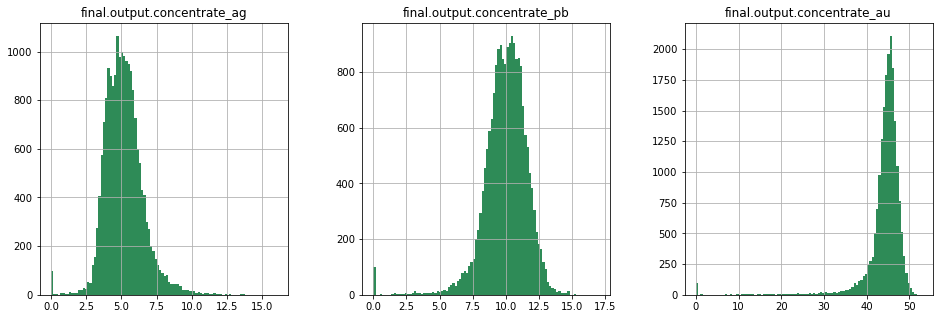

In [30]:
# histogram of final output concentrate
hist(full_df, final_output, color[2], 3)

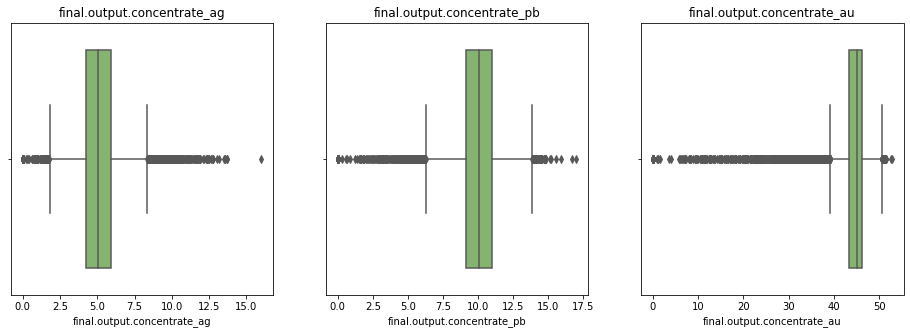

In [31]:
# boxplot of final output concentrate
boxplot(full_df, final_output, palette[2], 3)

In [32]:
# average of concentration on final output stage
final_output_ag_avg = full_df['final.output.concentrate_ag'].mean()
final_output_pb_avg = full_df['final.output.concentrate_pb'].mean()
final_output_au_avg = full_df['final.output.concentrate_au'].mean()

In [33]:
# lists of average values of silver, lead and gold on each stage
silv_concentrate = [rougher_output_ag_avg, primary_cleaner_ag_avg, final_output_ag_avg]
lead_concentrate = [rougher_output_pb_avg, primary_cleaner_pb_avg, final_output_pb_avg]
gold_concentrate = [rougher_output_au_avg, primary_cleaner_au_avg, final_output_au_avg]

In [34]:
# stages for analysis of metals concentration
stages = ['rougher_output', 'primary_cleaner', 'final_output']

In [35]:
# function to plot graph of metal concentrations 
def plot_concentration(gold, lead, silver, period):    
    plt.plot(period, gold, color='orange', label='gold')
    plt.plot(period, lead, color='aqua', label='lead')
    plt.plot(period, silver, color='grey', label='silver')
    plt.ylabel('Concentration, g/L')
    plt.title('Concentration of metals')
    plt.legend()
    plt.show()

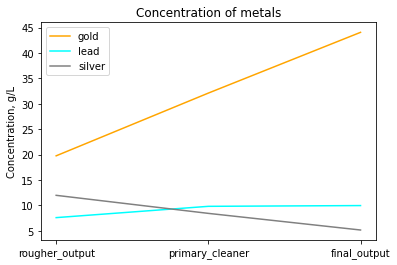

In [36]:
# plot concentration graphs
plot_concentration(gold_concentrate, lead_concentrate, silv_concentrate, stages)

Since the gold recovery process assumes a 24 hour cycle, it is possible to compare the change in gold concentration from each experiment and find the best result.

In [37]:
# find the best trial with gold concentration progress
full_df['refine_au'] = (full_df['final.output.concentrate_au'] \
                     - full_df['rougher.output.concentrate_au']) 

refine_au_df = full_df[['date', 'refine_au', 'final.output.recovery']]
refine_au_df = full_df.sort_values(by='refine_au', ascending=False)
refine_au_df.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.calculation.recovery,year,month,trial,hour,refine_au
date_id,,,,,,,,,,,,,,,,,,,,,
1473227999000000000,2016-09-07 05:59:59,3.70,6.92,9.13,50.84,61.17,10.52,3.28,9.56,4.91,...,2.90,-576.08,19.98,-597.85,-0.0,2016,9,7,5,50.84
1473238799000000000,2016-09-07 08:59:59,3.57,7.20,9.25,50.66,58.81,10.25,3.25,9.90,4.94,...,2.98,-600.25,19.98,-601.40,-0.0,2016,9,7,8,50.66
1473242399000000000,2016-09-07 09:59:59,3.56,7.24,9.36,50.62,61.24,10.26,3.26,9.96,4.80,...,3.00,-600.87,20.00,-601.16,-0.0,2016,9,7,9,50.62
1473231599000000000,2016-09-07 06:59:59,3.64,7.09,9.38,50.57,60.64,10.56,3.30,9.87,4.90,...,2.94,-603.97,19.95,-600.92,-0.0,2016,9,7,6,50.57
1473224399000000000,2016-09-07 04:59:59,3.83,6.95,9.06,50.52,62.31,10.84,3.17,9.45,4.59,...,2.90,-563.97,20.07,-601.60,-0.0,2016,9,7,4,50.52


With regard to dynamics of increasing the concentration of gold, the best experiment №7 of September 2016

In [38]:
# filter out the best trial for gold concentration progress
best_trial_au_df = full_df[full_df.date.str.contains('2016-09-07')]

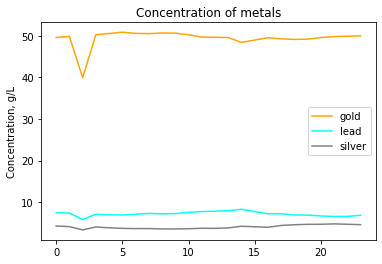

In [39]:
# plot dynamics of concentration change over 24h trial period
plot_concentration(
    best_trial_au_df['final.output.concentrate_au'], 
    best_trial_au_df['final.output.concentrate_pb'], 
    best_trial_au_df['final.output.concentrate_ag'], 
    best_trial_au_df['hour']
)

As seen on the histograms and boxplots, the concentration of metals is characterized by a normal distribution, all values ​​are distributed evenly about the median. As the recovery steps progress, the boundaries of the normal range of gold concentrations decrease from about 13 to 10 g/l, therefore, the scatter of values ​​decreases. Most of the concentration indicators are near the highest (median) value. This suggests that the parameters of the processes are chosen correctly.

Also values ​​of the change in the average concentration of metals in the three stages are presented namely rougher_output, primary_cleaner and final_output. The gold concentration increases linearly from 20 to 45 g/l. While other metals (silver and lead) are in the range between 5 and 12 g/l.

Additionally, the dynamics of changes in the concentration of metals during a 24-hour experiment is shown for the best result of an increase in the concentration of gold. The values ​​are stable throughout the interval except 1.5..2 hours after the start of the experiment.

#### Raw material grain size distributions in training and test data

In [40]:
# grain size variables
feed_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']  

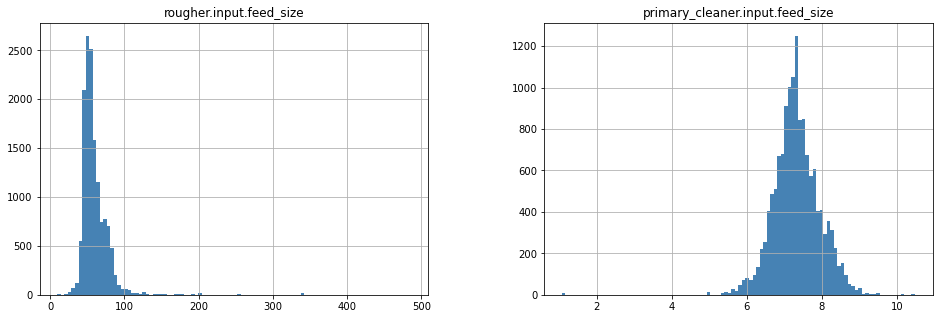

In [41]:
# histogram of grain size in train dataframe 
hist(train_df, feed_size, color[3], 2)

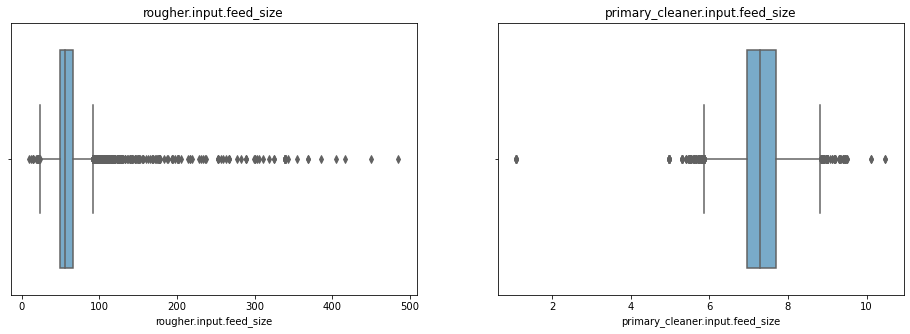

In [42]:
# boxplot of of grain size in train dataframe 
boxplot(train_df, feed_size, palette[3], 2)

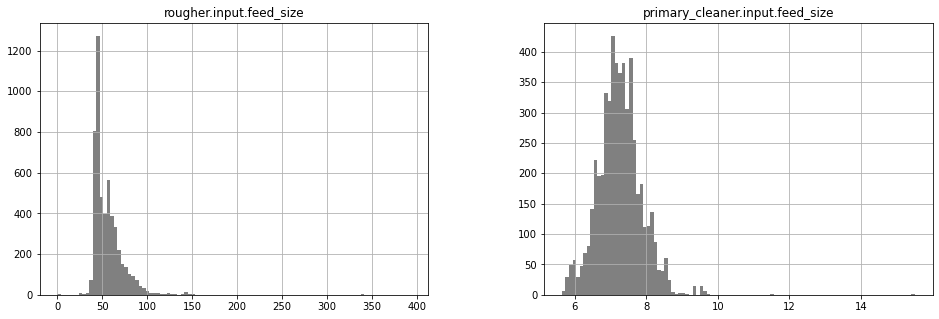

In [43]:
# histogram of grain size in test dataframe 
hist(test_df, feed_size, color[4], 2)

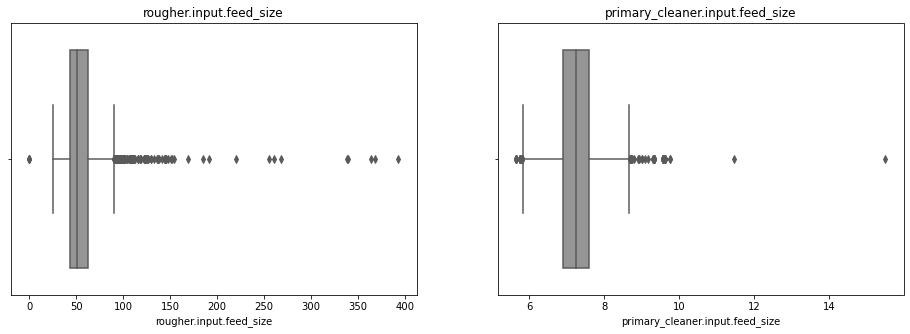

In [44]:
# boxplot of of grain size in test dataframe 
boxplot(test_df, feed_size, palette[4], 2)

Distribution histograms show that there are outliers on the train and test data. Therefore, a filter must be applied to make the distributions the same for the machine learning model.

In [45]:
# filter out train data
train_df = train_df[(train_df['rougher.input.feed_size'] < 200)
                  & (train_df['primary_cleaner.input.feed_size'] > 5)
                  & (train_df['primary_cleaner.input.feed_size'] < 10)] 

In [46]:
# filter out test data
test_df = test_df[(test_df['rougher.input.feed_size'] < 200)
                & (test_df['primary_cleaner.input.feed_size'] > 5)
                & (test_df['primary_cleaner.input.feed_size'] < 10)] 

t-test for analysis of the correspondence between the distributions of train and test samples

In [47]:
# samples of rougher.input.feed_size
rougher_train = pd.Series(train_df['rougher.input.feed_size'])
rougher_test = pd.Series(test_df['rougher.input.feed_size'])

In [48]:
# samples of primary_cleaner.input.feed_size
primary_cleaner_train = pd.Series(train_df['primary_cleaner.input.feed_size'])
primary_cleaner_test = pd.Series(test_df['primary_cleaner.input.feed_size'])     

In [49]:
# test the equality of the average values of both samples
def t_test(data_1, data_2, param):  
    
    # threshold for statistical significance
    alpha = 0.05 
    results = st.ttest_ind(data_1, data_2)
    print('p-value:', results.pvalue)
    
    if results.pvalue < alpha:
        print('{} in test/train data are equal'.format(param))
    else:
        print('{} in test/train data are not equal'.format(param))

In [50]:
# test the equality of the average values
t_test(rougher_train, rougher_test, 'rougher.input.feed_size')

p-value: 9.943446716560238e-45
rougher.input.feed_size in test/train data are equal


In [51]:
# test the equality of the average values
t_test(primary_cleaner_train, primary_cleaner_test, 'primary_cleaner.input.feed_size')

p-value: 1.2867455814904547e-11
primary_cleaner.input.feed_size in test/train data are equal


The p-value characterizes the probability of an outcome in which the null hypothesis is true, namely that there is no relationship between the variables. p-value less than alpha = 0.05 is statistically significant, i.e. less than 5% chance that the null hypothesis is true.

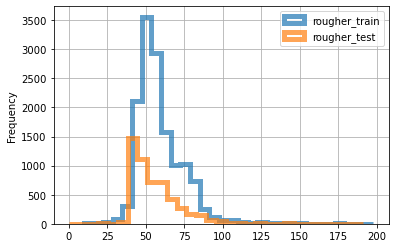

In [52]:
# comparison of histograms 'rougher_train' and 'rougher_test'
ax = rougher_train.plot(
    kind='hist', histtype='step', bins=30, linewidth=5, alpha=0.7, 
    label='rougher_train', grid=True, legend=True,
)
rougher_test.plot(
    kind='hist', histtype='step', bins=30, linewidth=5, alpha=0.7, 
    label='rougher_test', ax=ax, grid=True, legend=True,
);

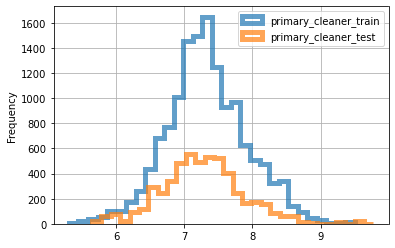

In [53]:
# comparison of histograms 'primary_cleaner_train' and 'primary_cleaner_test'
ax = primary_cleaner_train.plot(
    kind='hist', histtype='step', bins=30, linewidth=5, alpha=0.7, 
    label='primary_cleaner_train', grid=True, legend=True,
)
primary_cleaner_test.plot(
    kind='hist', histtype='step', bins=30, linewidth=5, alpha=0.7, 
    label='primary_cleaner_test', ax=ax, grid=True, legend=True,
);

#### Total concentration of substances at different stages in the training and test data

In [54]:
# get column names
col_name_train = list(train_df.columns.values)
col_name_test = list(test_df.columns.values)

In [55]:
# find different columns between train and test datasets
diff_names = list(set(col_name_train) ^ set(col_name_test))
diff_cols = full_df[diff_names]

In [56]:
# merge test data with missing columns from train data by index 
test_df = pd.merge(test_df, diff_cols, left_index=True, right_index=True)

In [57]:
# print out shapes of train and test data
print('Train data size:', train_df.shape)
print('Test data size:', test_df.shape)

Train data size: (14050, 87)
Test data size: (5279, 87)


In [58]:
# nan values in testing data
print(
    'NaN values in primary_cleaner.output.concentrate_pb:', 
    test_df['primary_cleaner.output.concentrate_pb'].isna().sum()
)

print(
    'NaN values in primary_cleaner.output.concentrate_sol:', 
    test_df['primary_cleaner.output.concentrate_sol'].isna().sum()
)

NaN values in primary_cleaner.output.concentrate_pb: 28
NaN values in primary_cleaner.output.concentrate_sol: 78


In [59]:
# fill in NaN values in datasets
test_df = test_df.fillna(method='ffill').fillna(method='bfill')

In [60]:
# check for missing values
test_df.isna().sum()

date                                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
                                                     ..
rougher.calculation.floatbank11_sulfate_to_au_feed    0
final.output.concentrate_pb                           0
final.output.tail_au                                  0
rougher.output.concentrate_pb                         0
rougher.output.tail_au                                0
Length: 87, dtype: int64

In [61]:
# shape of testing data
test_df.shape

(5279, 87)

In [62]:
# sum of concentrations in train data
train_df['rougher.input.feed.sum'] = \
    train_df['rougher.input.feed_ag'] \
  + train_df['rougher.input.feed_pb'] \
  + train_df['rougher.input.feed_au'] \
  + train_df['rougher.input.feed_sol']

train_df['rougher.output.concentrate.sum'] = \
    train_df['rougher.output.concentrate_ag'] \
  + train_df['rougher.output.concentrate_pb'] \
  + train_df['rougher.output.concentrate_au'] \
  + train_df['rougher.output.concentrate_sol']  

train_df['final.output.concentrate.sum'] = \
    train_df['final.output.concentrate_ag'] \
  + train_df['final.output.concentrate_pb'] \
  + train_df['final.output.concentrate_au'] \
  + train_df['final.output.concentrate_sol']  

In [63]:
# sum of concentrations in test data
test_df['rougher.input.feed.sum'] = \
    test_df['rougher.input.feed_ag'] \
  + test_df['rougher.input.feed_pb'] \
  + test_df['rougher.input.feed_au'] \
  + test_df['rougher.input.feed_sol']

test_df['rougher.output.concentrate.sum'] = \
    test_df['rougher.output.concentrate_ag'] \
  + test_df['rougher.output.concentrate_pb'] \
  + test_df['rougher.output.concentrate_au'] \
  + test_df['rougher.output.concentrate_sol']  

test_df['final.output.concentrate.sum'] = \
    test_df['final.output.concentrate_ag'] \
  + test_df['final.output.concentrate_pb'] \
  + test_df['final.output.concentrate_au'] \
  + test_df['final.output.concentrate_sol']  

In [64]:
# sum of concentrations 
sum_concentrate = [
    'rougher.input.feed.sum', 
    'rougher.output.concentrate.sum', 
    'final.output.concentrate.sum'
]

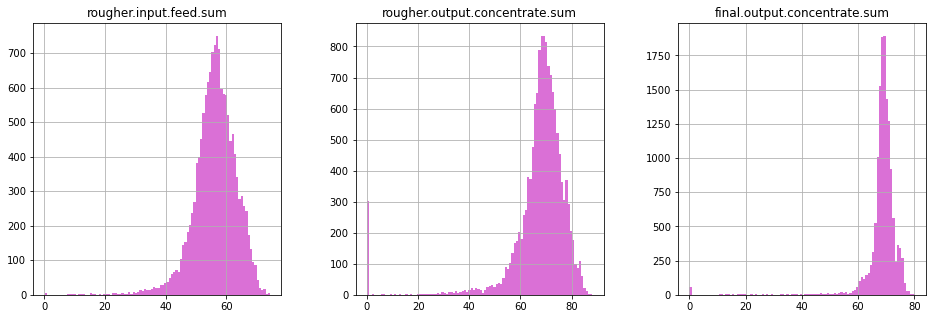

In [65]:
# histogram of sum of concentrations in train data
hist(train_df, sum_concentrate, color[5], 3)

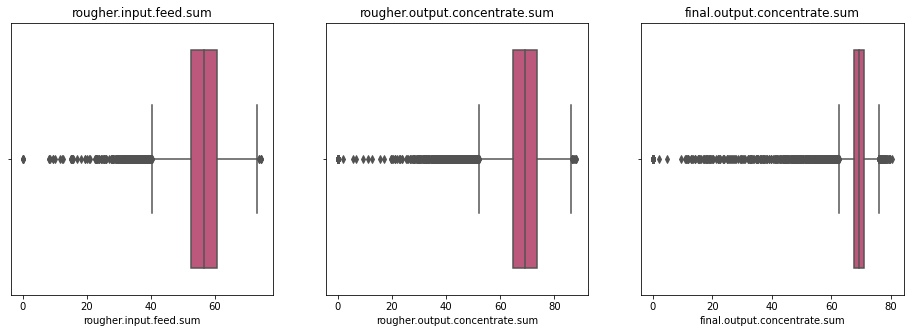

In [66]:
# boxplot of sum of concentrations in train data
boxplot(train_df, sum_concentrate, palette[5], 3)

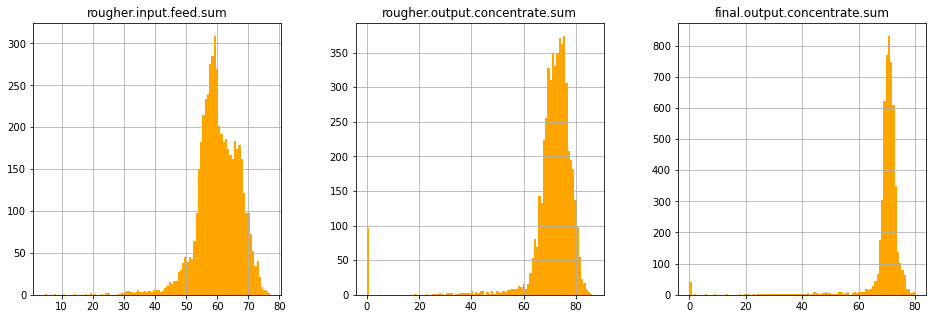

In [67]:
# histogram of sum of concentrations in test data
hist(test_df, sum_concentrate, color[6], 3)

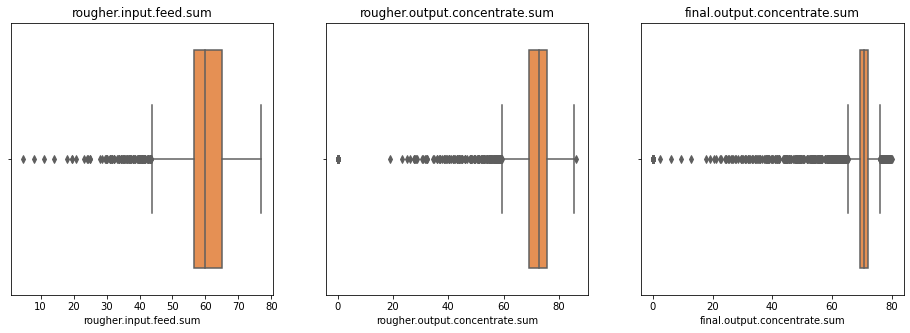

In [68]:
# boxplot of sum of concentrations in test data
boxplot(test_df, sum_concentrate, palette[6], 3)

In [69]:
# calculation of zeros in columns
def calc_zeros(data, col):
    for i in col:
        ratio = len(data[data[i] == 0]) / len(data)
        percent = '{:.1%}'.format(ratio)
        print('Percentage of zeros in {}:'.format(i), percent)

In [70]:
# percentage of zeros in training data
calc_zeros(train_df, sum_concentrate)

Percentage of zeros in rougher.input.feed.sum: 0.0%
Percentage of zeros in rougher.output.concentrate.sum: 2.1%
Percentage of zeros in final.output.concentrate.sum: 0.4%


In [71]:
# percentage of zeros in testing data
calc_zeros(test_df, sum_concentrate)

Percentage of zeros in rougher.input.feed.sum: 0.0%
Percentage of zeros in rougher.output.concentrate.sum: 1.8%
Percentage of zeros in final.output.concentrate.sum: 0.8%


Histograms and boxplots of total concentrations represent a normal distribution. Since the number of zero values is 0..2% of all data, no additional preprocessing is required.

### Step 4. Models training and testing

In [72]:
# reset indices
full_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [73]:
# create target for multi-output models
y_mult = train_df[['rougher.output.recovery', 'final.output.recovery']]

In [74]:
# create target for single-output models
keys = test_df['date_id']
y_temp = full_df[['date_id', 'rougher.output.recovery', 'final.output.recovery']]
y_sing = y_temp[y_temp['date_id'].isin(keys)].drop(['date_id'], axis=1)

In [75]:
# drop columns
train_df.drop(columns=diff_cols, inplace=True)
test_df.drop(columns=diff_cols, inplace=True)

In [76]:
# create features
X = train_df.drop(['date', 'date_id'], axis=1)

In [77]:
# convert pandas dataframes to numpy arrays
X_num = X.to_numpy()
y_num = y_mult.to_numpy()

In [78]:
# split training and validation data by 75/25 
X_train, X_val, y_train, y_val = train_test_split(
    X_num, y_num, random_state=777, test_size=0.25
) 

#### Depth defenition of Multi-output Decision Tree

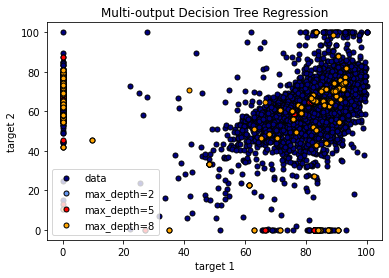

In [79]:
# fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# predict
y_1_pred = regr_1.predict(X_val)
y_2_pred = regr_2.predict(X_val)
y_3_pred = regr_3.predict(X_val)

# plot the results
plt.figure()
s = 25
plt.scatter(y_train[:, 0], y_train[:, 1], c='navy', s=s, edgecolor='black', label='data')
plt.scatter(y_1_pred[:, 0],y_1_pred[:, 1], c='cornflowerblue', s=s, edgecolor='black', label='max_depth=2')
plt.scatter(y_2_pred[:, 0], y_2_pred[:, 1], c='red', s=s, edgecolor='black', label='max_depth=5')
plt.scatter(y_3_pred[:, 0], y_3_pred[:, 1], c='orange', s=s, edgecolor='black', label='max_depth=8')
plt.xlabel('target 1')
plt.ylabel('target 2')
plt.title('Multi-output Decision Tree Regression')
plt.legend(loc='best')
plt.show()

As seen on the scatter plot, the deeper the better. Tree depth = 8 demonstrates better model performance.

#### Feature Importance

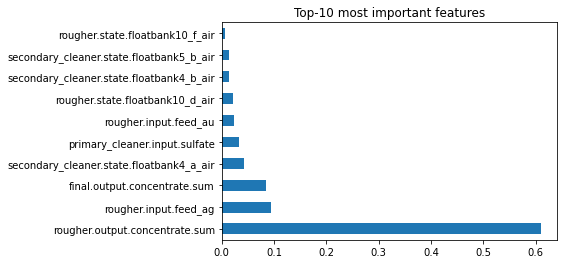

In [80]:
# Decision Tree Regressor model
dtr = DecisionTreeRegressor(
    criterion='mse', 
    splitter='best', 
    max_depth=8, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=777, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    ccp_alpha=0.0
)
dtr.fit(X_train, y_train)

# # use built-in class feature_importances of tree based regressor
# print(dtr.feature_importances_) 

# plot graph of feature importances for better visualization
feat_importances = pd.Series(dtr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top-10 most important features')

plt.show()

In [81]:
# dataframe with feature's correlation 
corr_df = train_df[['rougher.state.floatbank10_f_air',
                    'secondary_cleaner.state.floatbank5_b_air',
                    'secondary_cleaner.state.floatbank4_b_air',
                    'rougher.state.floatbank10_d_air',
                    'rougher.input.feed_au',
                    'primary_cleaner.input.sulfate',
                    'secondary_cleaner.state.floatbank4_a_air',
                    'final.output.concentrate.sum',
                    'rougher.input.feed_ag',
                    'rougher.output.concentrate.sum']]

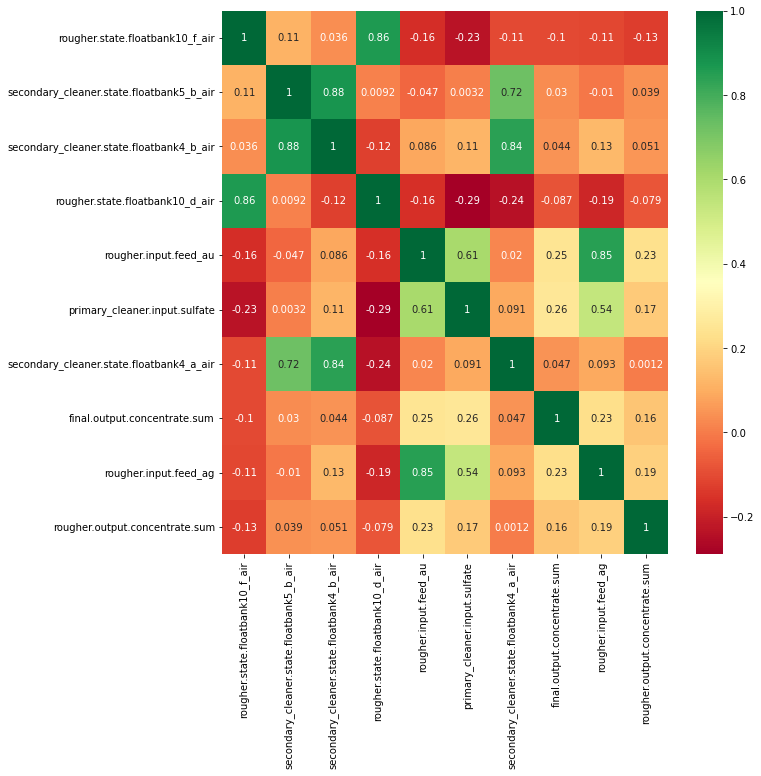

In [82]:
# plot heatmap of correlation matrix
corrmat = corr_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
g=sns.heatmap(X[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Based on the Feature importance and Correlation matrix, the top 10 parameters that affect the efficiency of predictions are used to further build machine learning models.

#### Cross-Validation with Linear Regression

In order to determine the best parameters for training the model and avoid overfitting, the Cross-Validation method is used. The workflow is presented in the diagram below.

In [83]:
# grid search technique
Image(url='https://scikit-learn.org/stable/_images/grid_search_workflow.png', 
      width=400, height=250
)

The training set in k-fold CV is split into k subsets. For each of the k "folds", the following procedure is performed:

- the model is trained using k-folds as training data;

- the resulting model is tested on the rest of the data (used as test data for calculating accuracy metrics).

As a result, the k-fold cross-validation metric is the average of the values calculated in the loop.

In [84]:
# cross-validation data
Image(url='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png', 
      width=500, height=350
)

In [85]:
# dataframe with feature's correlation 
X_corr = X[['rougher.state.floatbank10_f_air',
            'secondary_cleaner.state.floatbank5_b_air',
            'secondary_cleaner.state.floatbank4_b_air',
            'rougher.state.floatbank10_d_air',
            'rougher.input.feed_au',
            'primary_cleaner.input.sulfate',
            'secondary_cleaner.state.floatbank4_a_air',
            'final.output.concentrate.sum',
            'rougher.input.feed_ag',
            'rougher.output.concentrate.sum']]

In [86]:
# convert from pandas dataframe to numpy array
X_corr_num = X_corr.to_numpy()      

In [87]:
# split training and validation data by 75/25 
X_train_corr, X_val_corr, y_train_corr, y_val_corr = train_test_split(
    X_corr_num, y_num, random_state=777, test_size=0.25
) 

In [88]:
# Linear Regression model
lr = LinearRegression(
    fit_intercept=True, 
    normalize='deprecated', 
    copy_X=True, 
    n_jobs=None, 
    positive=False
)

In [89]:
# define the function to return the SMAPE value
def calc_smape(true, pred) -> float:
  
    # convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(true, np.ndarray), isinstance(pred, np.ndarray)]):
        true, pred = np.array(true), np.array(pred)
  
    return round(
        np.mean(np.abs(true - pred) / 
        ((np.abs(true) + np.abs(pred)) / 2)
        ) * 100, 2
    )

In [90]:
# create sMAPE scorer
smape_scorer = make_scorer(calc_smape, greater_is_better=False)

In [91]:
# create a cross-validation scheme with 5 splits 
folds = KFold(n_splits=5, shuffle=True, random_state=777)
scores = cross_val_score(lr, X_train_corr, y_train_corr, scoring=smape_scorer, cv=folds)
scores   

array([-10.84, -11.37, -10.99, -10.64, -10.71])

In [92]:
# R2 metric for validation data
scores = cross_val_score(lr, X_val_corr, y_val_corr, scoring=smape_scorer, cv=folds)
scores  

array([-10.26, -11.18, -10.63, -10.92, -10.53])

The sMAPE metric showed high performance across all five folds. But in order to apply the top 10 parameters, it is still needed to check the optimal number of parameters using Grid Search Cross-Validation

#### Hyperparameter tuning with Grid Search Cross-Validation

In [93]:
# number of features in training data
X_train_corr.shape

(10537, 10)

In [94]:
# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]

In [95]:
# perform grid search
# specify model
lr_cv = LinearRegression(
    fit_intercept=True, 
    normalize='deprecated', 
    copy_X=True, 
    n_jobs=None, 
    positive=False
)

# fit the model with Recursive Feature Elimination (RFE)
lr_cv.fit(X_train_corr, y_train_corr)
rfe = RFE(lr_cv)  

# call Grid Search function
model_cv = GridSearchCV(
    estimator=rfe, 
    param_grid=hyper_params, 
    cv=folds, 
    verbose=1,
    scoring=smape_scorer, 
    return_train_score=True
)  

# fit the model
model_cv.fit(X_train_corr, y_train_corr)                             

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=RFE(estimator=LinearRegression(normalize='deprecated')),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True,
             scoring=make_scorer(calc_smape, greater_is_better=False),
             verbose=1)

In [96]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.09,4.55e-02,1.00e-03,9.65e-06,1,{'n_features_to_select': 1},-10.85,-11.19,-10.73,-10.36,...,-10.72,0.29,2,-10.70,-10.55,-10.72,-10.82,-10.78,-10.71,0.09
1,0.06,7.40e-03,3.33e-03,2.90e-03,2,{'n_features_to_select': 2},-10.84,-11.18,-10.69,-10.35,...,-10.70,0.29,1,-10.68,-10.54,-10.71,-10.81,-10.76,-10.70,0.09
2,0.08,1.70e-02,1.22e-03,6.13e-04,3,{'n_features_to_select': 3},-11.59,-12.00,-11.60,-11.22,...,-11.54,0.27,10,-11.51,-11.37,-11.55,-11.66,-11.60,-11.54,0.10
3,0.06,5.92e-03,1.35e-03,6.38e-04,4,{'n_features_to_select': 4},-11.19,-11.65,-11.30,-10.94,...,-11.20,0.27,8,-11.18,-11.03,-11.20,-11.31,-11.26,-11.20,0.09
4,0.04,2.25e-03,9.68e-04,3.80e-04,5,{'n_features_to_select': 5},-11.31,-11.60,-11.25,-10.90,...,-11.18,0.28,7,-11.31,-10.96,-11.13,-11.24,-11.21,-11.17,0.12
5,0.04,2.41e-03,1.02e-03,3.63e-04,6,{'n_features_to_select': 6},-11.24,-11.62,-11.24,-10.90,...,-11.16,0.29,6,-11.24,-10.95,-11.13,-11.24,-11.20,-11.15,0.11
6,0.04,6.15e-03,9.23e-04,2.13e-04,7,{'n_features_to_select': 7},-11.22,-11.68,-11.35,-11.06,...,-11.24,0.27,9,-11.24,-11.06,-11.22,-11.32,-11.31,-11.23,0.09
7,0.03,9.53e-04,9.93e-04,3.02e-04,8,{'n_features_to_select': 8},-10.96,-11.51,-11.18,-10.78,...,-11.05,0.27,5,-11.06,-10.87,-11.03,-11.15,-11.10,-11.04,0.09
8,0.02,2.93e-03,1.76e-03,7.11e-04,9,{'n_features_to_select': 9},-10.91,-11.41,-11.08,-10.70,...,-10.98,0.25,4,-10.99,-10.80,-10.95,-11.07,-11.01,-10.96,0.09
9,0.01,6.79e-04,1.29e-03,2.38e-04,10,{'n_features_to_select': 10},-10.84,-11.37,-10.99,-10.64,...,-10.91,0.26,3,-10.92,-10.73,-10.89,-11.00,-10.95,-10.90,0.09


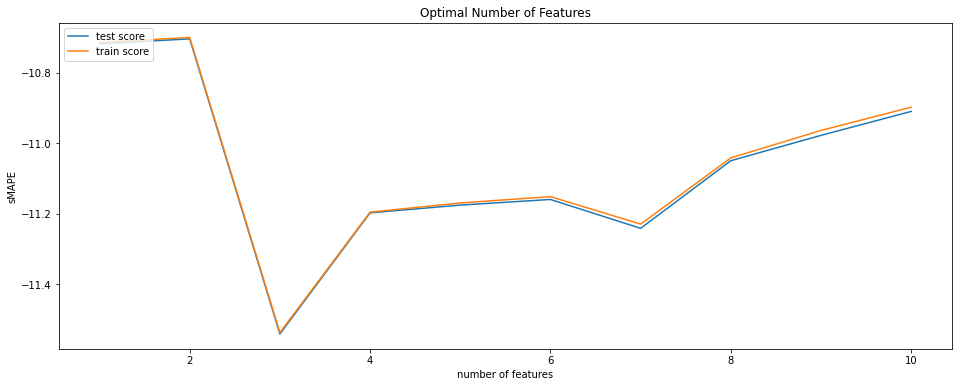

In [97]:
# plotting cv results
plt.figure(figsize=(16, 6))
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.xlabel('number of features')
plt.ylabel('sMAPE')
plt.title('Optimal Number of Features')
plt.legend(['test score', 'train score'], loc='upper left');

In [98]:
# final model for multi-output
n_features_optimal = 10

lr_mult = LinearRegression(
    fit_intercept=True, 
    normalize='deprecated', 
    copy_X=True, 
    n_jobs=None, 
    positive=False
)
lr_mult.fit(X_train_corr, y_train_corr)

rfe_mult = RFE(lr_mult, n_features_to_select=n_features_optimal)             
rfe_mult = rfe.fit(X_train_corr, y_train_corr)

In [99]:
# make predictions on validation data
y_val_pred = lr_mult.predict(X_val_corr)
r2_val = r2_score(y_val_corr, y_val_pred)
print('R2 score:', round(r2_val, 3))

R2 score: 0.416


Due to the fact that the model has shown high metrics on the validation data, it can also be applied to the test data.

In [100]:
# create features and targets for testing
X_test = test_df.drop(['date', 'date_id'], axis=1)
y_corr = y_sing

In [101]:
# dataframe with feature's correlation 
X_test_corr = X_test[['rougher.state.floatbank10_f_air',
                      'secondary_cleaner.state.floatbank5_b_air',
                      'secondary_cleaner.state.floatbank4_b_air',
                      'rougher.state.floatbank10_d_air',
                      'rougher.input.feed_au',
                      'primary_cleaner.input.sulfate',
                      'secondary_cleaner.state.floatbank4_a_air',
                      'final.output.concentrate.sum',
                      'rougher.input.feed_ag',
                      'rougher.output.concentrate.sum']]

In [102]:
# fill in NaN values in datasets
X_test_corr = X_test_corr.fillna(method='ffill').fillna(method='bfill')
y_corr = y_corr.fillna(method='ffill').fillna(method='bfill')

In [103]:
# convert pandas dataframes to numpy arrays
X_test_corr = X_test_corr.to_numpy()
y_corr = y_corr.to_numpy()

In [104]:
# make predictions on testing data with multi-output
y_pred_lr = lr_mult.predict(X_test_corr)
r2_mult = r2_score(y_corr, y_pred_lr)
print('R2 score:', round(r2_mult, 3))

R2 score: 0.429


Since the multi-output model cannot be used for two targets separately, a new model is built with the hyperparameters defined in the previous step.

In [105]:
# model for the uniform target
lr_uni = LinearRegression(
    fit_intercept=True, 
    normalize='deprecated', 
    copy_X=True, 
    n_jobs=None, 
    positive=False
)

In [106]:
# fit the model for the 1st target
lr_uni.fit(X_train_corr, y_train_corr[:, 0])
rfe_uni = RFE(lr_uni, n_features_to_select=n_features_optimal)             
rfe_uni = rfe.fit(X_train_corr, y_train_corr[:, 0])

# make predictions on testing data
y_1_pred = lr_uni.predict(X_test_corr)
r2_uni_1 = r2_score(y_corr[:, 0], y_1_pred)
print('R2 score:', round(r2_uni_1, 3))

R2 score: 0.629


In [107]:
# fit the model for the 2nd target
lr_uni.fit(X_train_corr, y_train_corr[:, 1])
rfe_uni = RFE(lr_uni, n_features_to_select=n_features_optimal)             
rfe_uni = rfe.fit(X_train_corr, y_train_corr[:, 1])

# make predictions on testing data
y_2_pred = lr_uni.predict(X_test_corr)
r2_uni_2 = r2_score(y_corr[:, 1], y_2_pred)
print('R2 score:', round(r2_uni_2, 3))

R2 score: 0.23


In [108]:
# print out results
print('1st sMAPE:', calc_smape(y_corr[:, 0], y_1_pred))
print('2nd sMAPE:', calc_smape(y_corr[:, 1], y_2_pred))
print(
    'Total sMAPE:', round(
        0.25 * calc_smape(y_corr[:, 0], y_1_pred) 
      + 0.75 * calc_smape(y_corr[:, 1], y_2_pred), 2
    )
)    

1st sMAPE: 9.53
2nd sMAPE: 9.2
Total sMAPE: 9.28


Ensemble methods are also used to compare results

#### Bagging Regressor

In [4]:
# Bagging Regressor
Image(url='https://miro.medium.com/max/1050/1*Bic1BVl02k2evh0MmebhIQ.png', 
      width=500, height=350
)

In [110]:
# Bagging Regressor model
br = BaggingRegressor(
    base_estimator=SVR(), 
    n_estimators=10, 
    max_samples=1.0, 
    max_features=1.0, 
    bootstrap=True, 
    bootstrap_features=False, 
    oob_score=False, 
    warm_start=False, 
    n_jobs=None, 
    random_state=777, 
    verbose=0
)

In [111]:
# fit the model for the 1st target
br.fit(X_train_corr, y_train_corr[:, 0])   

# make predictions on testing data
y_1_pred_br = br.predict(X_test_corr)
r2_uni_1_br = r2_score(y_corr[:, 0], y_1_pred_br)
print('R2 score:', round(r2_uni_1_br, 3))

R2 score: 0.052


In [112]:
# fit the model for the 2nd target
br.fit(X_train_corr, y_train_corr[:, 1])   

# make predictions on testing data
y_2_pred_br = br.predict(X_test_corr)
r2_uni_2_br = r2_score(y_corr[:, 1], y_2_pred_br)
print('R2 score:', round(r2_uni_2_br, 3))

R2 score: 0.053


In [113]:
# print out results
print('1st sMAPE:', calc_smape(y_corr[:, 0], y_1_pred_br))
print('2nd sMAPE:', calc_smape(y_corr[:, 1], y_2_pred_br))
print(
    'Total sMAPE:', round(
        0.25 * calc_smape(y_corr[:, 0], y_1_pred_br) 
      + 0.75 * calc_smape(y_corr[:, 1], y_2_pred_br), 2
    )
)    

1st sMAPE: 7.86
2nd sMAPE: 8.95
Total sMAPE: 8.68


#### Gradient Boosting Regressor

In [114]:
# Gradient Boosting Regressor
Image(url='https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG', 
      width=500, height=300
)

In [115]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(
    loss='huber', 
    learning_rate=0.1, 
    n_estimators=10, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=8, 
    min_impurity_decrease=0.0, 
    random_state=777, 
    max_features=None, 
    alpha=0.9, 
    verbose=0, 
    max_leaf_nodes=None, 
    validation_fraction=0.1, 
    tol=0.0001, 
    ccp_alpha=0.0
)

In [116]:
# fit the model for the 1st target
gb.fit(X_train_corr, y_train_corr[:, 0])   

# make predictions on testing data
y_1_pred_gb = gb.predict(X_test_corr)
r2_uni_1_gb = r2_score(y_corr[:, 0], y_1_pred_gb)
print('R2 score:', round(r2_uni_1_gb, 3))

R2 score: 0.601


In [117]:
# fit the model for the 2nd target
gb.fit(X_train_corr, y_train_corr[:, 1])   

# make predictions on testing data
y_2_pred_gb = gb.predict(X_test_corr)
r2_uni_2_gb = r2_score(y_corr[:, 1], y_2_pred_gb)
print('R2 score:', round(r2_uni_2_gb, 3))

R2 score: 0.133


In [118]:
# print out results
print('1st sMAPE:', calc_smape(y_corr[:, 0], y_1_pred_gb))
print('2nd sMAPE:', calc_smape(y_corr[:, 1], y_2_pred_gb))
print(
    'Total sMAPE:', round(
        0.25 * calc_smape(y_corr[:, 0], y_1_pred_gb) 
      + 0.75 * calc_smape(y_corr[:, 1], y_2_pred_gb), 2
    )
)  

1st sMAPE: 7.95
2nd sMAPE: 9.2
Total sMAPE: 8.89


#### Dummy Regressor

In [119]:
# Dummy Regressor
dr = DummyRegressor(
    strategy='mean', 
    constant=None, 
    quantile=None
)

In [120]:
# fit the model for the 1st target
dr.fit(X_train_corr, y_train_corr[:, 0])
# make predictions on testing data
y_1_pred_dr = dr.predict(X_test_corr)
r2_uni_1_dr = r2_score(y_corr[:, 0], y_1_pred_dr)
print('R2 score:', round(r2_uni_1_dr, 3))

R2 score: -0.031


In [121]:
# fit the model for the 2nd target
dr.fit(X_train_corr, y_train_corr[:, 1])
# make predictions on testing data
y_2_pred_dr = dr.predict(X_test_corr)
r2_uni_2_dr = r2_score(y_corr[:, 1], y_2_pred_dr)
print('R2 score:', round(r2_uni_2_dr, 3))

R2 score: -0.04


In [122]:
# print out results
print('1st sMAPE:', calc_smape(y_corr[:, 0], y_1_pred_dr))
print('2nd sMAPE:', calc_smape(y_corr[:, 1], y_2_pred_dr))
print(
    'Total sMAPE:', round(
        0.25 * calc_smape(y_corr[:, 0], y_1_pred_dr) 
      + 0.75 * calc_smape(y_corr[:, 1], y_2_pred_dr), 2
    )
)  

1st sMAPE: 10.38
2nd sMAPE: 10.2
Total sMAPE: 10.24


In [123]:
# variables for sMAPE
lr_1 = calc_smape(y_corr[:, 0], y_1_pred)
lr_2 = calc_smape(y_corr[:, 1], y_2_pred)
lr_t = 0.25 * lr_1 + 0.75 * lr_2

br_1 = calc_smape(y_corr[:, 0], y_1_pred_br)
br_2 = calc_smape(y_corr[:, 1], y_2_pred_br)
br_t = 0.25 * br_1 + 0.75 * br_2

gb_1 = calc_smape(y_corr[:, 0], y_1_pred_gb)
gb_2 = calc_smape(y_corr[:, 1], y_2_pred_gb)
gb_t = 0.25 * gb_1 + 0.75 * gb_2

dr_1 = calc_smape(y_corr[:, 0], y_1_pred_dr)
dr_2 = calc_smape(y_corr[:, 1], y_2_pred_dr)
dr_t = 0.25 * dr_1 + 0.75 * dr_2


In [124]:
# print out results
results = {
        'ML model': ['Linear Regression', 'Bagging Regressor', 
                     'Gradient Boosting', 'Dummy Regressor'], 
        '1st sMAPE': [lr_1, br_1, gb_1, dr_1],
        '2nd sMAPE': [lr_2, br_2, gb_2, dr_2],
        'Total sMAPE': [lr_t, br_t, gb_t, dr_t]
}
display(pd.DataFrame(results).sort_values('Total sMAPE', ascending=True, ignore_index=True))

,ML model,1st sMAPE,2nd sMAPE,Total sMAPE
0,Bagging Regressor,7.86,8.95,8.68
1,Gradient Boosting,7.95,9.20,8.89
2,Linear Regression,9.53,9.20,9.28
3,Dummy Regressor,10.38,10.20,10.24


The results of the model comparison show that for predicting the efficiency of rough and final concentrate ("rougher.output.recovery", "final.output.recovery") the best model is Bagging Regressor (final sMAPE = 8.68).

### Conclusions

During the initial phase of the project, study of technological process and data checking such as recovery factor, metal concentration and grain size are performed. Additionally, an experiment is determined with the best dynamics of increasing the concentration of gold and a corresponding graph is built to analyze the process.

Due to the fact that the technological process of gold recovery includes a large number of parameters, the main focus of the research is on choosing the optimal number and composition of input parameters for a machine learning model. For these purposes, at the beginning, the Feature Importance method is used, which, based on the Multi-output Decision Tree algorithm, selects the top 10 parameters for further research.

Further, for additional verification of the number of parameters, the Cross-Validation with Linear Regression and Grid Search method is applied, which also confirms the correctness of the selected parameters. The R2 metric shows high values ​​on the validation data for 2 targets.

At the final stage of the project, four models are compared: Linear Regression, Bagging Regressor, Gradient Boosting Regressor and Dummy Regressor. According to the sMAPE metric, the results show that the most efficient model is the Bagging Regressor (sMAPE = 8.68). In second place, the Gradient Boosting algorithm also demonstrates high values ​​(sMAPE = 8.89), which indicates that it can be used to predict process parameters.